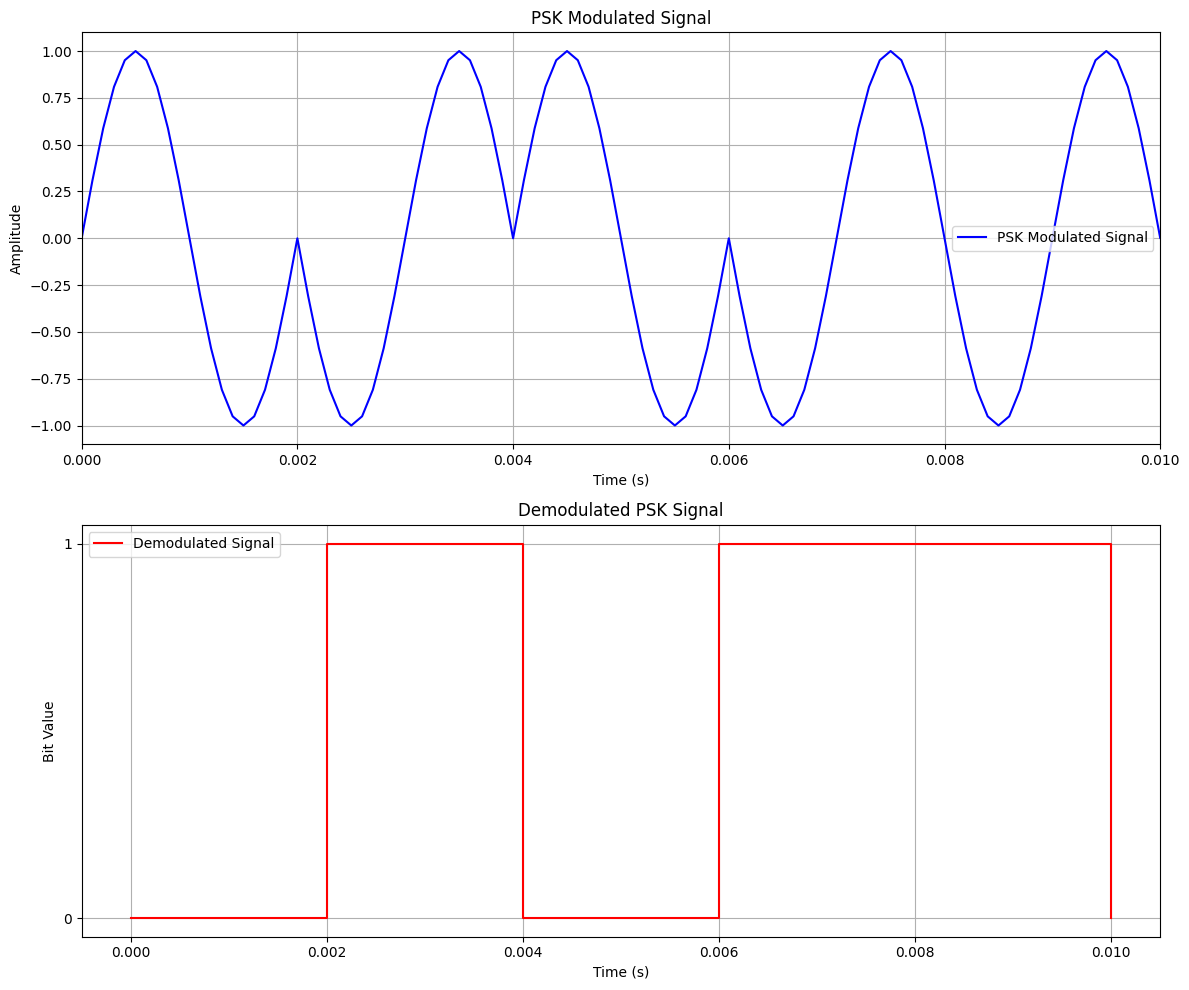

In [1]:
# Generation and detection of BPSK signals
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

def psk_modulation(bits, samples_per_symbol):
    modulation_order = 2
    phase_states = np.linspace(0, 2*np.pi, modulation_order, endpoint=False)
    phase_sequence = [phase_states[int(b)] for b in bits]
    phase_signal = np.repeat(phase_sequence, samples_per_symbol)
    t = np.arange(0, len(phase_signal))/10e3
    fc = 0.5e3
    carrier_signal = np.sin(2*np.pi*fc*t + phase_signal)
    return carrier_signal, t

def psk_demodulation(signal, samples_per_symbol):
    t = np.arange(0,len(signal))/10e3
    fc = 0.5e3
    carrier_signal = np.sin(2*np.pi*fc*t)
    x = carrier_signal*signal
    x = np.sum(sliding_window_view(x, window_shape=samples_per_symbol), axis=1)
    symbols = x[::samples_per_symbol]
    bits = symbols < 0
    return bits.astype(int)

def plot_signals(modulated_signal, demodulated_bits, samples_per_symbol):
    t = np.arange(0, len(modulated_signal))/10e3
    fig, axs = plt.subplots(2, 1, figsize=(12, 10))
    axs[0].plot(t[:len(bits)*samples_per_symbol], modulated_signal[:len(bits)*samples_per_symbol], label='PSK Modulated Signal', color='b')
    axs[0].set_title('PSK Modulated Signal')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_xlim(0, 0.010)
    axs[0].grid(True)
    axs[0].legend()
    axs[1].plot(t[:len(demodulated_bits)*samples_per_symbol:samples_per_symbol], demodulated_bits, drawstyle='steps-post', color='r', label='Demodulated Signal')
    axs[1].set_title('Demodulated PSK Signal')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Bit Value')
    axs[1].set_yticks([0, 1])
    axs[1].set_yticklabels(['0', '1'])
    axs[1].grid(True)
    axs[1].legend()
    plt.tight_layout()
    plt.show()

bits = [0, 1, 0, 1, 1, 0]
samples_per_symbol = 20
psk_signal, t = psk_modulation(bits, samples_per_symbol)
demod_data = psk_demodulation(psk_signal, samples_per_symbol)
plot_signals(psk_signal, demod_data, samples_per_symbol)


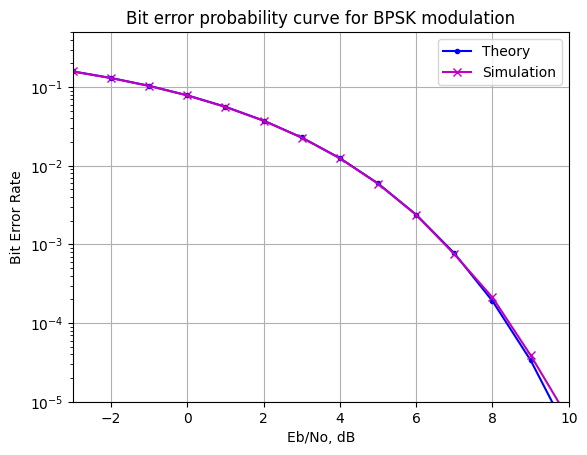

In [2]:
# Performance Analysis 
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

N = 10**6
np.random.seed(100)
np.random.seed(200)

ip = np.random.rand(N) > 0.5
s = 2 * ip - 1
n = 1/np.sqrt(2) * (np.random.randn(N) + 1j * np.random.randn(N))
Eb_N0_dB = np.arange(-3, 11)

nErr = np.zeros(len(Eb_N0_dB))
for ii, Eb_N0 in enumerate(Eb_N0_dB):
    y = s + 10**(-Eb_N0/20) * n
    ipHat = np.real(y) > 0
    nErr[ii] = np.sum(ip != ipHat)

simBer = nErr / N
theoryBer = 0.5 * erfc(np.sqrt(10**(Eb_N0_dB/10)))

plt.figure()
plt.semilogy(Eb_N0_dB, theoryBer, 'b.-', label='Theory')
plt.semilogy(Eb_N0_dB, simBer, 'mx-', label='Simulation')
plt.axis([-3, 10, 1e-5, 0.5])
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('Bit error probability curve for BPSK modulation')
plt.show()
